In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the California Housing dataset
data = fetch_california_housing(as_frame = True)
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

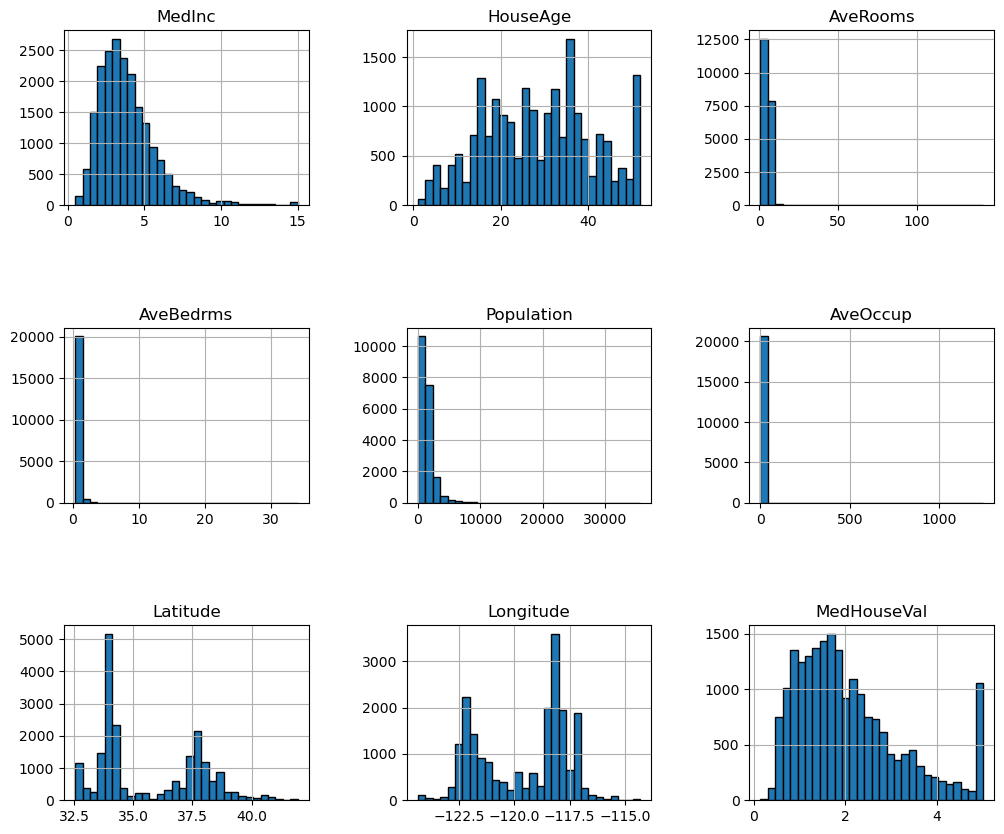

In [3]:
data.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
#plt.subplots(3,3)[1].set_xlim(0, 10)

We can first focus on features for which their distributions would be more or less expected.

The median income is a distribution with a long tail. It means that the salary of people is more or less normally distributed but there is some people getting a high salary.

Regarding the average house age, the distribution is more or less uniform.

The target distribution has a long tail as well. In addition, we have a threshold-effect for high-valued houses: all houses with a price above 5 are given the value 5.

Focusing on the average rooms, average bedrooms, average occupation, and population, the range of the data is large with unnoticeable bin for the largest values. It means that there are very high and few values (maybe they could be considered as outliers?). We can see this specificity looking at the statistics for these features:

In [4]:
# Convert to DataFrame for easier exploration
df = pd.DataFrame(data.data, columns=data.feature_names)
#The target variable is the median house value for California districts,
#expressed in hundreds of thousands of dollars ($100,000)
df['Target'] = data.target


print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  Target  
0        -12

In [5]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
data.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


All these features have large outliers. 

Guess hotels and motels with large number of bedrooms wrt the remaining 75%, large number of rooms may be due to vacation resorts or very large and rare households (something like a castle or a gigantic mansion in the hills maybe).

Large avr occupation can be also attributed to hotels or vacation resorts.

In [6]:
# Split into features (X), everything except the target 
X = df.drop('Target', axis=1)

#or some specific feature
#X = df[['MedInc']]

#and target (y)
y = df['Target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mean square error --> no penalty
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.5558915986952442
R-squared: 0.575787706032451


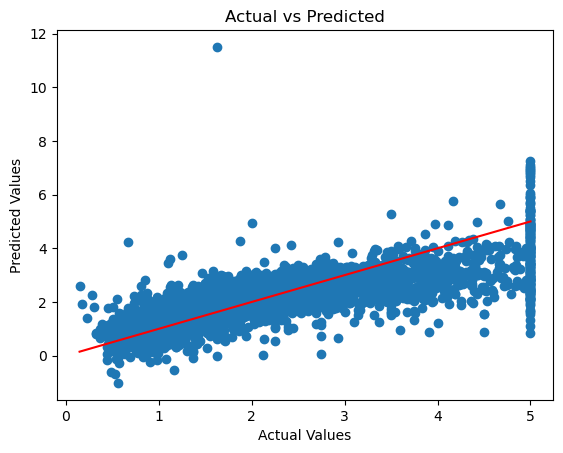

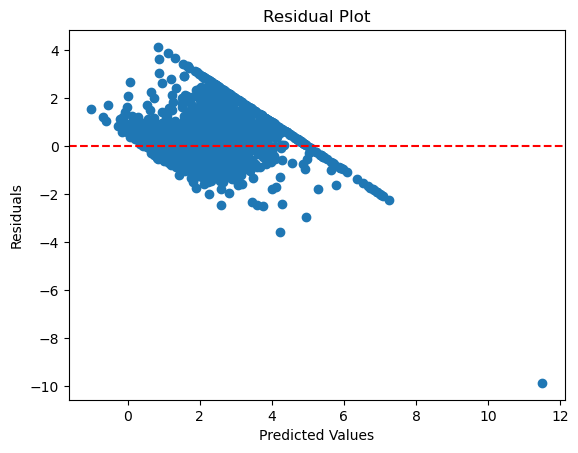

In [8]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [9]:
# Access the model's coefficients, interesting to gauge the relation between features and target
coefficients = model.coef_

# Display the coefficients
#print("Coefficients:", coefficients)

# Optionally, map the coefficients back to the feature names
feature_names = X_train.columns
for feature, coef in zip(feature_names, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")

Feature: MedInc, Coefficient: 0.8543830309268547
Feature: HouseAge, Coefficient: 0.12254623807840709
Feature: AveRooms, Coefficient: -0.29441013447329933
Feature: AveBedrms, Coefficient: 0.3392594905944842
Feature: Population, Coefficient: -0.0023077231458302175
Feature: AveOccup, Coefficient: -0.04082910308508779
Feature: Latitude, Coefficient: -0.8969288766386654
Feature: Longitude, Coefficient: -0.8698417752417179


The main positive contributor to the house value is the median income of the bloc (reasonable, the more you earn the more you can spend into real estate). 

Another significant contributor is the avr number of bedrooms but not the number of rooms, I would have expected the larger the house the larger the price, maybe in some of the most expansive areas like San Francisco Bay due to crammed spaces pricey houses have fewer rooms dragging the price down.

House age in the bloc also seems to play a role, middle aged people working well paid jobs tend to have pricer houses but maybe less children?

Position also plays a crucial role, the closer the house is to large metro areas like San Francisco, Los Angeles and San Diego, the larger the price.

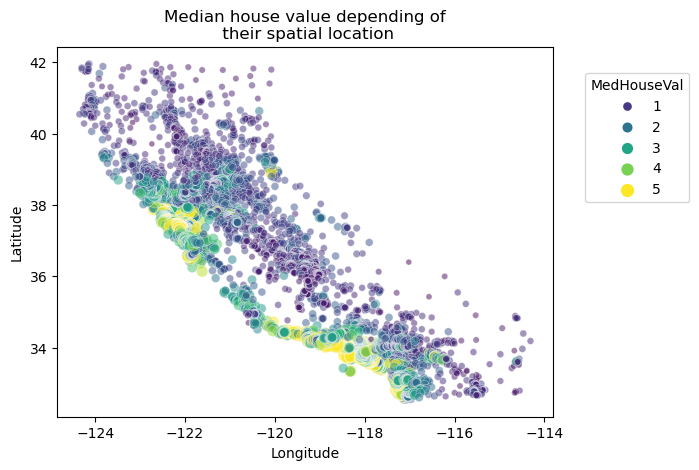

In [10]:
import seaborn as sns

sns.scatterplot(
    data=data.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

# Ridge and Lasso regression

In [22]:
# Mean square error --> no penalty
print(f'No regularization Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

No regularization Mean Squared Error: 0.5558915986952442
R-squared: 0.575787706032451


In [27]:
ridge = Ridge(alpha=1.0)  # You can tune alpha
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Ridge --> L2 penalty
print("Ridge MSE:", mse_ridge)
print(f'Ridge R-squared: {r2_ridge}')

Ridge MSE: 0.5558548589435971
Ridge R-squared: 0.5758157428913684


In [19]:
lasso = Lasso(alpha=0.1)  # You can tune alpha
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Lasso --> L1 penalty
print("Lasso MSE:", mse_lasso)
print(f'Lasso R-squared: {r2_lasso}')

Lasso MSE: 0.6796290284328825
Lasso R-squared: 0.48136113250290735


$R^2$ is a relative measure of how well the model explains variance (good for comparing models), while MSE is an absolute measure of error (good for understanding model performance in real-world terms).

$R^2$ tells you how much variance is explained by the model, but it doesn't tell you the magnitude of error, whereas MSE gives you the actual error magnitude in terms of squared units of the target variable.

Lower MSE indicates a better model because it means the predictions are closer to the actual values.

Higher MSE means the model’s predictions are further off from the actual values.

Ridge and Lasso tend to reduce overfitting, but they also typically result in a slightly lower $R^2$ than OLS because the model is constrained by the regularization term (even though it still tries to fit the data as well as possible).

Higher $R^2$ doesn’t necessarily mean a better model. A very high $R^2$ in OLS may indicate overfitting, where the model fits the training data too well, but performs poorly on unseen data.

Ridge and Lasso tend to have slightly lower R² values on training data but generally perform better on out-of-sample data because they avoid overfitting.

In practice, Ridge often outperforms Lasso when all features contribute a little bit, which might be the case here.

This is not a very high-dimensional dataset. So feature selection is helpful but not critical like it would be in datasets with hundreds of features.

Collinearity
Some features are likely correlated (e.g., AveRooms and AveBedrms).